https://github.com/aymericdamien/TensorFlow-Examples

## 1. Introduction

### Hell World

In [1]:
import tensorflow as tf
# Simple hello world using TensorFlow

# Create a Constant op
# The op is added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.

hello = tf.constant('Hello, TensorFlow!')

In [2]:
# Start tf session
sess = tf.Session()

In [3]:
# Run graph
print(sess.run(hello))

b'Hello, TensorFlow!'


### Basic Operations 

In [4]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

In [9]:
# Launch the default graph.
with tf.Session() as sess:
    print("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [10]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [11]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [14]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [15]:
# ----------------
# More in details:
# Matrix Multiplication from TensorFlow official tutorial

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

In [16]:
# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [17]:
# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

In [20]:
# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of threes ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


### TensorFlow Eager API basics

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
print("Setting Eager mode...")
tf.enable_eager_execution()
tfe = tf.contrib.eager

Setting Eager mode...
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
# Define constant tensors
print("Define constant tensors")
a = tf.constant(2)
print("a = %i" % a)
b = tf.constant(3)
print("b = %i" % b)

Define constant tensors
a = 2
b = 3


In [4]:
# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")
c = a + b
print("a + b = %i" % c)
d = a * b
print("a * b = %i" % d)

Running operations, without tf.Session
a + b = 5
a * b = 6


In [5]:
# Full compatibility with Numpy
print("Mixing operations with Tensors and Numpy Arrays")

# Define constant tensors
a = tf.constant([[2., 1.],
                 [1., 0.]], dtype=tf.float32)
print("Tensor:\n a = %s" % a)
b = np.array([[3., 0.],
              [5., 1.]], dtype=np.float32)
print("NumpyArray:\n b = %s" % b)

Mixing operations with Tensors and Numpy Arrays
Tensor:
 a = tf.Tensor(
[[2. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)
NumpyArray:
 b = [[3. 0.]
 [5. 1.]]


In [6]:
# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")

c = a + b
print("a + b = %s" % c)

d = tf.matmul(a, b)
print("a * b = %s" % d)

Running operations, without tf.Session
a + b = tf.Tensor(
[[5. 1.]
 [6. 1.]], shape=(2, 2), dtype=float32)
a * b = tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


In [7]:
print("Iterate through Tensor 'a':")
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i][j])

Iterate through Tensor 'a':
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


## 2. Basic Models

### Linear Regression

In [1]:
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.106208548 W= 0.34528488 b= 0.113070354
Epoch: 0100 cost= 0.102828495 W= 0.33959362 b= 0.15401246
Epoch: 0150 cost= 0.099838980 W= 0.33424088 b= 0.19251956
Epoch: 0200 cost= 0.097194940 W= 0.3292066 b= 0.22873661
Epoch: 0250 cost= 0.094856493 W= 0.3244716 b= 0.26279962
Epoch: 0300 cost= 0.092788309 W= 0.32001814 b= 0.29483697
Epoch: 0350 cost= 0.090959176 W= 0.31582972 b= 0.32496876
Epoch: 0400 cost= 0.089341559 W= 0.31189027 b= 0.35330805
Epoch: 0450 cost= 0.087910898 W= 0.3081852 b= 0.37996247
Epoch: 0500 cost= 0.086645663 W= 0.30470034 b= 0.4050318
Epoch: 0550 cost= 0.085526802 W= 0.30142298 b= 0.4286092
Epoch: 0600 cost= 0.084537305 W= 0.29834047 b= 0.45078474
Epoch: 0650 cost= 0.083662257 W= 0.29544124 b= 0.47164178
Epoch: 0700 cost= 0.082888469 W= 0.2927144 b= 0.49125788
Epoch: 0750 cost= 0.082204200 W= 0.29014996 b= 0.5097074
Epoch: 0800 cost= 0.081599116 W= 0.28773782 b= 0.5270596
Epoch: 0850 cost= 0.081064075 W= 0.28546917 b= 0.54338
Epoch: 0900 cost= 0.0805

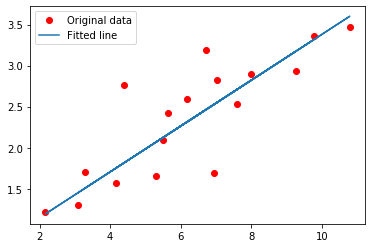

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Linear Regression (eager api)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [5]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost= 22.056007385 W= -0.6179227 b= -0.094497114
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 cost= 6.711404800 W= -0.17721999 b= -0.031399384
Epoch: 0100 cost= 0.104648262 W= 0.3460262 b= 0.12960956
Epoch: 0200 cost= 0.098670289 W= 0.33523065 b= 0.20614527
Epoch: 0300 cost= 0.093981504 W= 0.32566977 b= 0.27392757
Epoch: 0400 cost= 0.090303950 W= 0.31720236 b= 0.33395764
Epoch: 0500 cost= 0.087419450 W= 0.30970338 b= 0.3871221
Epoch: 0600 cost= 0.085157029 W= 0.30306205 b= 0.43420607
Epoch: 0700 cost= 0.083382547 W= 0.2971803 b= 0.47590506
Epoch: 0800 cost= 0.081990749 W= 0.29197127 b= 0.5128348
Epoch: 0900 cost= 0.080899082 W= 0.28735802 b= 0.54554075
Epoch: 1000 cost= 0.080042869 W= 0.28327236 b= 0.57450616


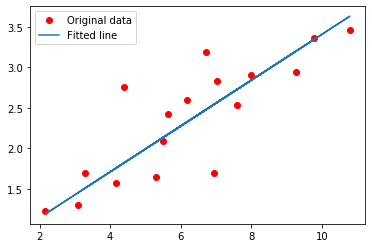

In [6]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()

## Nearest Neighbor

In [6]:
import numpy as np
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [16]:
?tf.argmin

In [7]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
# tf.placeholder(dtype, shape=None, name=None)
# 784是图片的像素28 * 28
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
# 按行求和
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.argmin(distance, 0)# 返回矩阵横列或者纵列的最小值的坐标，取决于第二个参数 

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:

# Start training
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Test 0 Prediction: 8 True Class: 8
Test 1 Prediction: 7 True Class: 7
Test 2 Prediction: 0 True Class: 0
Test 3 Prediction: 0 True Class: 0
Test 4 Prediction: 0 True Class: 0
Test 5 Prediction: 3 True Class: 3
Test 6 Prediction: 0 True Class: 8
Test 7 Prediction: 7 True Class: 7
Test 8 Prediction: 7 True Class: 7
Test 9 Prediction: 7 True Class: 7
Test 10 Prediction: 0 True Class: 0
Test 11 Prediction: 0 True Class: 0
Test 12 Prediction: 2 True Class: 2
Test 13 Prediction: 4 True Class: 4
Test 14 Prediction: 8 True Class: 8
Test 15 Prediction: 4 True Class: 4
Test 16 Prediction: 5 True Class: 5
Test 17 Prediction: 9 True Class: 4
Test 18 Prediction: 6 True Class: 6
Test 19 Prediction: 7 True Class: 7
Test 20 Prediction: 6 True Class: 6
Test 21 Prediction: 1 True Class: 1
Test 22 Prediction: 0 True Class: 0
Test 23 Prediction: 8 True Class: 8
Test 24 Prediction: 9 True Class: 9
Test 25 Prediction: 5 True Class: 5
Test 26 Prediction: 0 True Class: 0
Test 27 Prediction: 4 True Class: 4
Te